In [1]:
!pip install -q gradio


     |████████████████████████████████| 979 kB 4.2 MB/s 
     |████████████████████████████████| 2.0 MB 31.6 MB/s 
     |████████████████████████████████| 206 kB 52.2 MB/s 
     |████████████████████████████████| 961 kB 39.3 MB/s 
     |████████████████████████████████| 3.6 MB 36.6 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 


In [2]:
import os
import tensorflow as tf
from keras.models import load_model
import cv2

import gradio as gr
import tensorflow as tf
import numpy as np
import requests

import cv2
from google.colab.patches import cv2_imshow

np.random.seed(42)

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:

categories = os.listdir('/content/gdrive/My Drive/datasets/train')
print(categories)

['Govinda', 'Ajay_Devgn', 'Aishwarya_Rai', 'Aamir_Khan', 'Abhishek_Bachchan', 'Hrithik_Roshan', 'Deepika_Padukone', 'Anushka_Sharma', 'Anushka_Shetty', 'Amitabh_Bachchan', 'Akshay_Kumar', 'Alia_Bhatt', 'Pooja_Hegde', 'Priyanka_Chopra', 'Kareena_Kapoor', 'Kajal_Aggarwal', 'R_Madhavan', 'Ranbir_Kapoor', 'Parineeti_Chopra', 'Preity_Zinta', 'John_Abraham', 'Juhi_Chawla', 'Karisma_Kapoor', 'Katrina_Kaif', 'Madhuri_Dixit']


In [11]:
model = tf.keras.models.load_model('/content/gdrive/My Drive/face_model.model')

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/haarcascade_frontalface_alt2.xml')

In [26]:
def detect_faces(img):

  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect faces
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  print(len(faces))
  # Draw rectangle around the faces and crop the faces
  if len(faces) == 0:
    res = classify_image(img)
    return res
  f_str=''
  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = img[y:y + h, x:x + w]
    f_str+= "\n"+classify_image(faces)
    print(f_str)
    cv2_imshow(faces)
    cv2.imwrite('face.jpg', faces)
  return f_str

In [27]:

def classify_image(inp):
  img_size=224
  img = cv2.resize(inp,(img_size,img_size))
  img = img.reshape(-1,img_size,img_size,3)
  prediction = model.predict(img)
  print(categories[np.argmax(prediction)]+" * " + str(prediction))
  return categories[np.argmax(prediction)]


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://17644.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


1
Ajay_Devgn * [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]

Ajay_Devgn


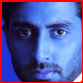

1
Deepika_Padukone * [[0.0000000e+00 0.0000000e+00 7.3677296e-22 0.0000000e+00 0.0000000e+00
  2.2327145e-18 9.9999702e-01 3.0176504e-06 0.0000000e+00 4.7397566e-29
  0.0000000e+00 0.0000000e+00 0.0000000e+00 6.6528990e-34 1.9809687e-17
  0.0000000e+00 1.1507274e-28 1.9185183e-11 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.2971794e-33 0.0000000e+00 0.0000000e+00]]

Deepika_Padukone


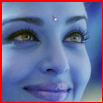

1
Deepika_Padukone * [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.2058346e-30 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]

Deepika_Padukone


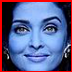

0
Anushka_Sharma * [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 6.7932446e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1
Ajay_Devgn * [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]

Ajay_Devgn


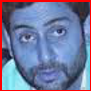

4
Kajal_Aggarwal * [[0.0000000e+00 1.2442605e-29 3.4170743e-35 0.0000000e+00 0.0000000e+00
  5.0280292e-02 4.1751623e-32 7.4216626e-07 0.0000000e+00 1.4892709e-28
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.6630901e-36 0.0000000e+00
  9.4971895e-01 3.7424369e-38 1.7309819e-13 0.0000000e+00 0.0000000e+00
  2.3919922e-26 1.9977420e-37 2.8433527e-37 0.0000000e+00 0.0000000e+00]]

Kajal_Aggarwal


Ajay_Devgn * [[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 7.1442440e-18 5.2995552e-20 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.7428283e-34]]

Kajal_Aggarwal
Ajay_Devgn


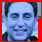

Abhishek_Bachchan * [[2.7475242e-38 9.1404870e-11 6.2231876e-29 9.4381028e-38 9.9939775e-01
  8.1807917e-13 5.2296389e-09 6.0223468e-04 2.4303959e-30 2.1588328e-34
  0.0000000e+00 0.0000000e+00 6.4203408e-29 4.9756892e-17 0.0000000e+00
  0.0000000e+00 1.2029099e-20 6.2336504e-11 0.0000000e+00 0.0000000e+00
  2.3169900e-27 0.0000000e+00 0.0000000e+00 1.8250502e-32 4.2562907e-24]]

Kajal_Aggarwal
Ajay_Devgn
Abhishek_Bachchan


Ajay_Devgn * [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]

Kajal_Aggarwal
Ajay_Devgn
Abhishek_Bachchan
Ajay_Devgn


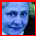

1
Ajay_Devgn * [[1.4992631e-37 9.9995947e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.0484007e-05 1.6269460e-20 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.0665064e-35]]

Ajay_Devgn


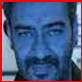

2
Deepika_Padukone * [[0.00000000e+00 4.16712883e-22 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.08109475e-19
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]

Deepika_Padukone


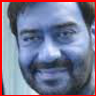

Ajay_Devgn * [[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3597226e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]

Deepika_Padukone
Ajay_Devgn


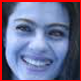

3
Deepika_Padukone * [[0.0000000e+00 1.1451061e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 3.2939303e-15 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0682622e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]

Deepika_Padukone


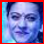

Anushka_Sharma * [[9.4425658e-26 3.8619627e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.1798318e-24 2.0721082e-08 9.9997878e-01 0.0000000e+00 1.2750465e-30
  0.0000000e+00 6.1296346e-37 1.2493988e-36 1.0500815e-23 5.0208208e-27
  0.0000000e+00 0.0000000e+00 2.1238817e-05 0.0000000e+00 0.0000000e+00
  1.0410978e-18 0.0000000e+00 3.1448415e-33 0.0000000e+00 0.0000000e+00]]

Deepika_Padukone
Anushka_Sharma


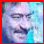

Ranbir_Kapoor * [[0.0000000e+00 2.7763706e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.5211377e-26 0.0000000e+00 1.4419979e-19 7.9522329e-36 3.7844569e-37
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3157521e-23 0.0000000e+00
  0.0000000e+00 1.6900766e-35 1.0000000e+00 0.0000000e+00 0.0000000e+00
  3.0568785e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]

Deepika_Padukone
Anushka_Sharma
Ranbir_Kapoor


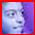

0
Amitabh_Bachchan * [[0.0000000e+00 1.3993285e-12 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.4094270e-26 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 8.5227155e-29 0.0000000e+00 0.0000000e+00]]
0
Abhishek_Bachchan * [[0.00000000e+00 3.54062434e-34 0.00000000e+00 1.24348815e-26
  1.00000000e+00 0.00000000e+00 1.79277577e-26 0.00000000e+00
  0.00000000e+00 5.52916161e-32 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.86743582e-26
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
1
Anushka_Sharma * [[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 6.144603e-16 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+

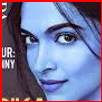

In [ ]:
image = gr.inputs.Image(shape=(224, 224))
gr.Interface(fn=detect_faces, inputs=image, outputs="text", capture_session=True,interpretation="default",verbose=True).launch(debug=True)